<img src="./logo_UNSAM.jpg" align= "right" width= "150" /> -->
## APS
## Trabajo práctico semanal 6: *Transformada Z y Respuesta en frecuencia*
### Violeta Manterola

Dado las siguientes ecuaciones en diferencias de los siguientes sistemas, que representan un filtro de media móvil: 

a) $y(n)=x(n−3)+x(n−2)+x(n−1)+x(n)$
 

b) $y(n)=x(n−4)+x(n−3)+x(n−2)+x(n−1)+x(n)$
 

c) $ y(n)=x(n)−x(n−1)$
 

d) $ y(n)=x(n)−x(n−2)$
 

Se pide:

1) Hallar   $$T(z)=\frac{Y(z)}{X(z)}$$

3) Calcular su respuesta en frecuencia de módulo y fase.

4) Simular y validar la respuesta en frecuencia de todos los sistemas con Numpy.

--------------------------------------------------------------------------------------------------------------------------------------------------------

La **transformada Z** es una herramienta fundamental en el análisis y diseño de sistemas discretos. Permite representar señales y sistemas en el dominio complejo, facilitando el estudio de sus propiedades, como estabilidad, causalidad y comportamiento en frecuencia. 
Se puede entender como una variación de la trasnformada de Fourier donde el radio no es unitario, es decir se le asgina una región de convergencia (*ROC*), introduciendo la varaible compleja $z \triangleq \ re^{jω}$. Cabe destacar que para obtener un sistema estable la ROC debe incluir al radio unitario, y los polos estar dentro de este radio. Teninedo en cuenta esto, a Transformada $Z$ de una respuesta al impulso se define como:

$$
H(z) = \mathcal{Z}\{h[n]\} \triangleq \sum_{n=-\infty}^{\infty} h[n](re^{j\omega})^{-n} = \sum_{n=-\infty}^{\infty} h[n] z^{-n}
$$

En este caso nos enfocaremos exclusivamente en sistemas *causales*, es decir, aquellos cuya respuesta al impulso \( h[n] \) es cero para \( n < 0 \). Este tipo de sistemas se puede modelar mediante ecuaciones en diferencias, y son comunes en filtros FIR (de respuesta finita al impulso).
Supongamos que tenemos una entrada $x(n)$ y a la salida la llamamdos $y(n)$, tenemos $y(n) = x(n-n_0)$, salida con restraso de $n_0$ muestras; aplicando la definición podemos escribir su transformada Z como: 
$$
Y(z) = \sum_{n=-\infty}^{\infty} y[n](z)^{-n} = \sum_{n=-\infty}^{\infty} x[n-n_0] z^{-n}= X(z) z^{-n_0}
$$
De esta manera, la Transformada Z permite representar el *retardo temporal* como una multiplicación por una potencia negativa de \( z \).
A partir de las transformadas de entrada y salida, la **función de transferencia** del sistema se define como:
$$
T(z)=\frac{Y(z)}{X(z)}
$$
Dicha función de trnasferencia que puede escribirse como la diferencia entre polinomios de potencias $ z^{-n}$; donde en aquellos puntos donde se anula el denominador son ceros y en el caso del denominador son polos. En este trabajo se determina la función de trasnferencia T(Z) de cada sistema mediante el uso de la Transformada Z, y a partir de esto se analiza su repeusta en frecuencia. 




En primer lugar se calculó cada transformada Z y luego se analizo su respuesta en frecuecnia de módulo y fase por escrito (lapiz y papel); para luego verificar y visualizar con mayor exactitud los resultados a traves del código con Numpy. 

[PDF del analisis a mano de los dos primeros puntos](analisis_previo_TS6.pdf)

In [3]:
#Código con numpy para verificar los resultados obtenidos previamente. 
import numpy as np
import matplotlib.pyplot as plt

w = np.linspace(0, np.pi, 1024) #frecuencia de 0 a π, xq solo me interesa hasta Nyquist para evitar aliasing! luego 1024 es la cantidad de puntos, aribitrairia. 
z = np.exp(1j * w) #para facilitar cuentas
# defino los filtros en función de su transformada Z, como se calculó a mano facilmente (con Z evaluada en e^{jω}) 
Tz = {
    'Filtro a': z**-3 + z**-2 + z**-1 + 1,
    'Filtro b': z**-4 + z**-3 + z**-2 + z**-1 + 1,
    'Filtro c': 1 - z**-1,
    'Filtro d': 1 - z**-2
}

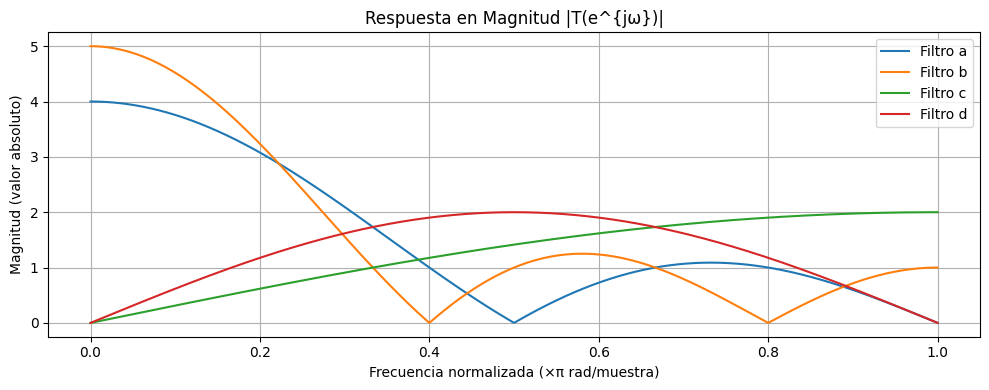

In [5]:
# --- Respuesta de módulo ---
plt.figure(figsize=(10, 4))
for label, T in Tz.items(): #recorre todos los filtros guardados en Tz, evluando en Z=e^{jω} asi obtengo la respuesta en frecuencia (T)
    plt.plot(w / np.pi, np.abs(T), label=label)  #calcula abs --> para ver la respuesta de módulo, eje normalizado de freucneias (0 a pi)
plt.title('Respuesta en Magnitud |T(e^{jω})|')
plt.xlabel('Frecuencia normalizada (×π rad/muestra)')
plt.ylabel('Magnitud (valor absoluto)')
plt.grid()
plt.legend()
plt.tight_layout()

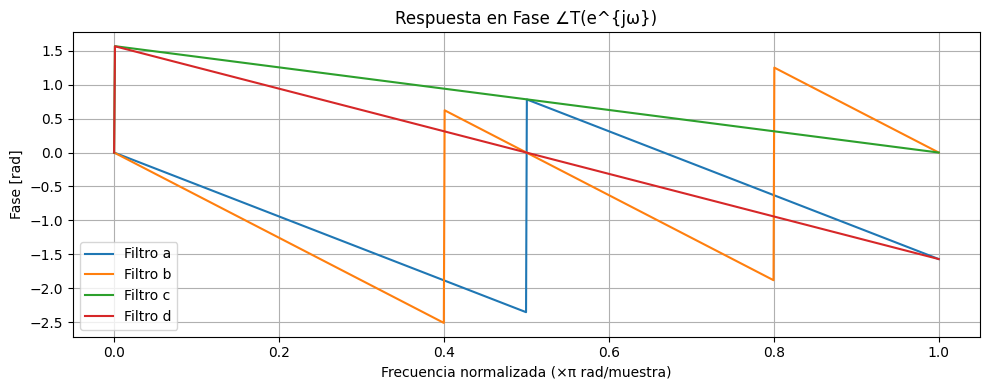

In [6]:
#%% Respuesta fase
plt.figure(figsize=(10, 4))
for label, T in Tz.items():
    plt.plot(w/np.pi, np.angle(T), label=label) #para ver la repseusta de fase
plt.title('Respuesta en Fase ∠T(e^{jω})')
plt.xlabel('Frecuencia normalizada (×π rad/muestra)')
plt.ylabel('Fase [rad]')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

**Análisis de los resultados**

A partir de la respuesta en frecuencia —tanto en módulo como en fase— puede deducirse que los filtros a y b alcanzan su máxima magnitud a bajas frecuencias, y esta va disminuyendo a medida que la frecuencia aumenta. Este comportamiento es característico de un filtro pasa bajos. Sin embargo, se observa que el filtro b presenta una pendiente más pronunciada que el a, lo que implica un mayor Q, es decir en un pasabajos más selectivo que el filtro a; esta dfierencia se debe a que el filtro b es de mayor orden. 

Por otro lado, los ultimos dos filtros muestran un comportamiento diferente al analizado previamente: ambos atenúan la señal a bajas frecuencias. Por un lado, el filtro C indica un comportamiento de pasa-altos ya que su magnitud comienza desde 0 y crece progresivamente hasta alcanzar su valor máximo en π. Mientras que el filtro D, atenúa también las bajas frecuencias, pero su ganancia no se mantiene alta en todo el espectro sino que alcanza su valor máximo en una frecuencia intermedia. Esto indica una banda de paso, es por esto que este último filtro puede decisrse que se comporta como un filtro pasa-banda. 

<Figure size 1000x400 with 0 Axes>

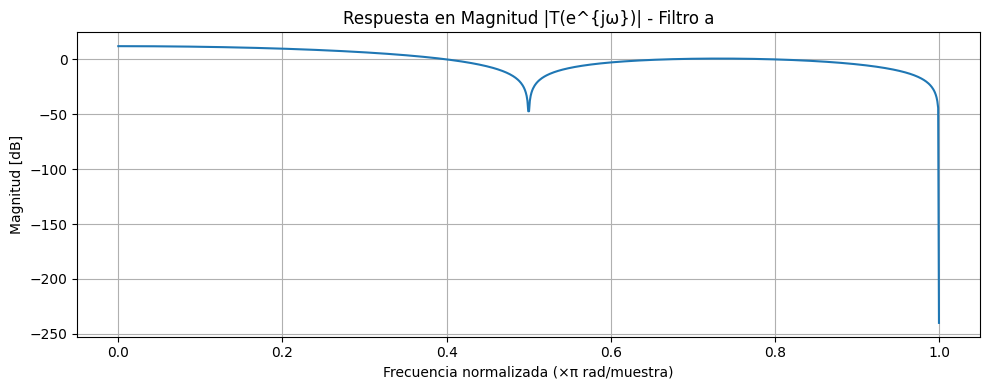

<Figure size 1000x400 with 0 Axes>

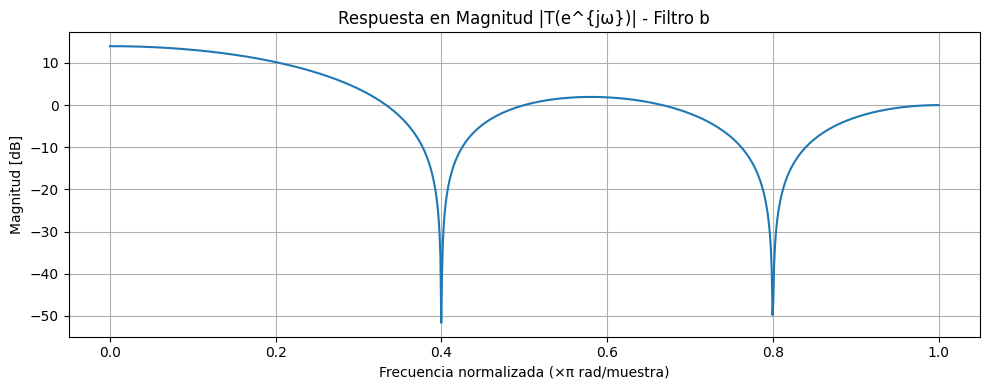

<Figure size 1000x400 with 0 Axes>

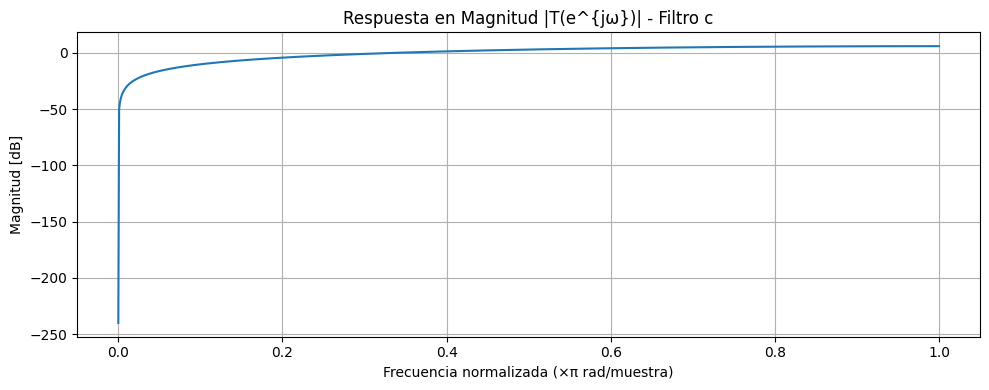

<Figure size 1000x400 with 0 Axes>

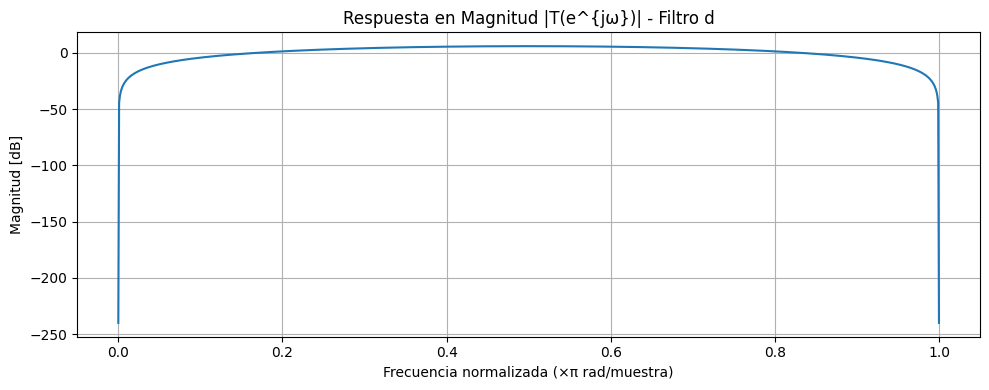

In [9]:
# respuesta de módulo expresada en dB: 
for label, T in Tz.items():
    plt.figure(figsize=(10, 4))
    plt.figure(figsize=(10, 4))
    plt.plot(w / np.pi, 20 * np.log10(np.abs(T)+ 1e-12 ))
    plt.title(f'Respuesta en Magnitud |T(e^{{jω}})| - {label}')
    plt.xlabel('Frecuencia normalizada (×π rad/muestra)')
    plt.ylabel('Magnitud [dB]')
    plt.grid()
    plt.tight_layout()
